# Test out a funciton from the interwebs
https://gist.github.com/dfm/5699c69a708a5f9cacb96771b69287ec


In [2]:

import numpy as np
import theano
import pymc3 as pm


def eval_in_model(var, point=None, return_func=False, model=None, **kwargs):
    """Evaluate a Theano tensor or PyMC3 variable in a PyMC3 model
    
    This method builds a Theano function for evaluating a node in the graph
    given the required parameters.
    
    Args:
        var: The variable or tensor to evaluate.
        point (Optional): A ``dict`` of input parameter values. This can be
            ``model.test_point`` (default), the result of ``pymc3.find_MAP``,
            a point in a ``pymc3.MultiTrace`` or any other representation of
            the input parameters.
            
    """
    model = pm.modelcontext(model)
    if point is None:
        point = model.test_point

    kwargs["on_unused_input"] = kwargs.get("on_unused_input", "ignore")
    func = theano.function(model.vars, var, **kwargs)
    args = [point[k.name] for k in model.vars]
    
# return func(*args)

In [16]:
with pm.Model() as model:
    x = pm.Uniform('x', 0, 1)
    y = pm.Uniform('y', 0, 1)
    inside = pm.math.sum(x**2 + y**2 < 1)
    total  = x.shape.eval()
    pi     = pm.Deterministic('pi', 4*inside/total)
    sample = pm.sample(1000)

MissingInputError: Input 0 of the graph (indices start from 0), used to compute sigmoid(x_interval__), was not provided and not given a value. Use the Theano flag exception_verbosity='high', for more information on this error.

ZeroDivisionError: integer division or modulo by zero

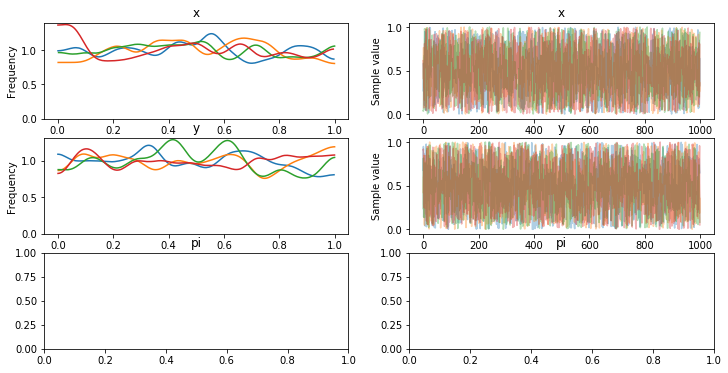

In [17]:
pm.traceplot(sample)